In [207]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras import initializers
from statsmodels.graphics.gofplots import qqplot

# Distributions

## Continous variables

### Normal distribution - Gaussian distribution (bell)

In [46]:
# random normal data
normal_data = stats.norm.rvs(size = 1000, random_state=1)
normal_data.shape

(1000,)

In [47]:
normal_data.min(), normal_data.max()

(-3.053764380426305, 3.9586027040379634)

<AxesSubplot: ylabel='Count'>

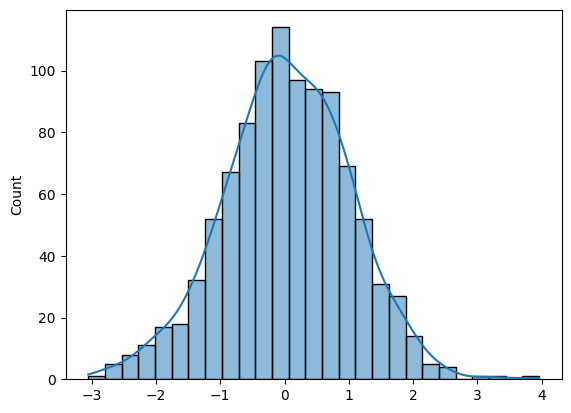

In [48]:
sns.histplot(normal_data, kde=True)

In [49]:
normal_data.mean(), np.median(normal_data), stats.mode(normal_data), np.var(normal_data), np.std(normal_data), np.quantile(normal_data, q=[0.25, 0.50, 0.75])

/tmp/ipykernel_7869/37127222.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  normal_data.mean(), np.median(normal_data), stats.mode(normal_data), np.var(normal_data), np.std(normal_data), np.quantile(normal_data, q=[0.25, 0.50, 0.75])


(0.03881247615960185,
 0.04129258886921605,
 ModeResult(mode=array([-3.05376438]), count=array([1])),
 0.9623691107920885,
 0.9810041339322116,
 array([-0.60016043,  0.04129259,  0.70399885]))

Normal distribution using the height of some people

In [50]:
data = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [51]:
len(data)

100

In [52]:
data.mean()

159.25

In [53]:
np.median(data)

159.25

In [54]:
stats.mode(data)

/tmp/ipykernel_7869/3267261142.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(data)


ModeResult(mode=array([157.5]), count=array([10]))

In [55]:
np.var(data), np.std(data), stats.variation(data) * 100

(186.3225, 13.65, 8.571428571428571)

<AxesSubplot: ylabel='Count'>

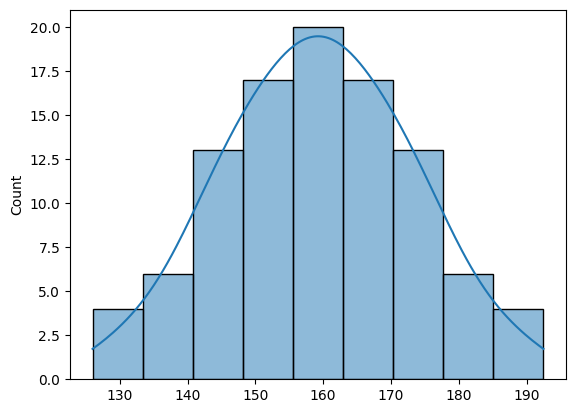

In [56]:
sns.histplot(data, kde=True)

#### Skew

<AxesSubplot: ylabel='Count'>

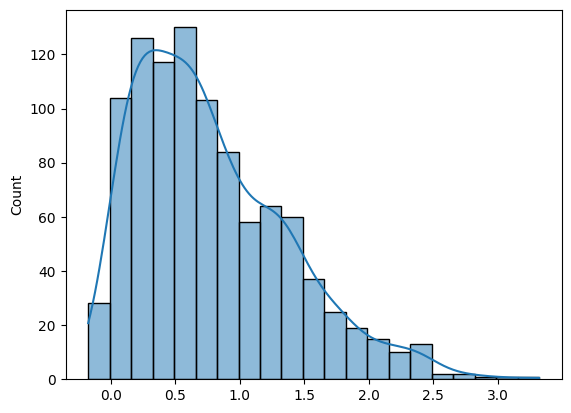

In [57]:
skew_positive = stats.skewnorm.rvs(a=10, size=1000)
sns.histplot(skew_positive, kde=True)

In [58]:
skew_positive.mean(), np.median(skew_positive), stats.mode(skew_positive)

/tmp/ipykernel_7869/1429421218.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  skew_positive.mean(), np.median(skew_positive), stats.mode(skew_positive)


(0.7786852105087276,
 0.6517400326367395,
 ModeResult(mode=array([-0.17634714]), count=array([1])))

<AxesSubplot: ylabel='Count'>

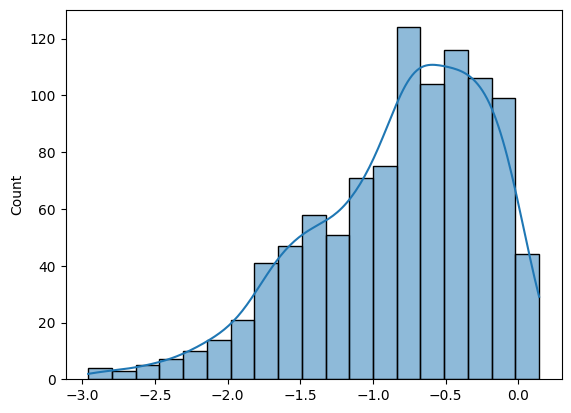

In [59]:
skew_negative = stats.skewnorm.rvs(a=-10, size=1000)
sns.histplot(skew_negative, kde=True)

In [60]:
skew_negative.mean(), np.median(skew_negative), stats.mode(skew_negative)

/tmp/ipykernel_7869/1716234514.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  skew_negative.mean(), np.median(skew_negative), stats.mode(skew_negative)


(-0.8174253813237708,
 -0.7177370278146388,
 ModeResult(mode=array([-2.95975956]), count=array([1])))

#### Standard normal distribution

$ z_{score} = \frac{x - mean}{\sigma} $

Standard normal distribution must have mean = 0 and standard deviation = 1

##### Manual approach

In [61]:
data

array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
       140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
       147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
       150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
       154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
       157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
       161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
       164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
       168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
       171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
       178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189. ,
       192.5])

In [62]:
mean = data.mean()
std = np.std(data)

mean, std

(159.25, 13.65)

Applying standart normal distribution formula

In [63]:
data_standard_normal_distribution = (data - mean) / std
data_standard_normal_distribution

array([-2.43589744, -2.17948718, -1.92307692, -1.92307692, -1.66666667,
       -1.66666667, -1.41025641, -1.41025641, -1.41025641, -1.41025641,
       -1.15384615, -1.15384615, -1.15384615, -1.15384615, -1.15384615,
       -1.15384615, -0.8974359 , -0.8974359 , -0.8974359 , -0.8974359 ,
       -0.8974359 , -0.8974359 , -0.8974359 , -0.64102564, -0.64102564,
       -0.64102564, -0.64102564, -0.64102564, -0.64102564, -0.64102564,
       -0.64102564, -0.38461538, -0.38461538, -0.38461538, -0.38461538,
       -0.38461538, -0.38461538, -0.38461538, -0.38461538, -0.38461538,
       -0.12820513, -0.12820513, -0.12820513, -0.12820513, -0.12820513,
       -0.12820513, -0.12820513, -0.12820513, -0.12820513, -0.12820513,
        0.12820513,  0.12820513,  0.12820513,  0.12820513,  0.12820513,
        0.12820513,  0.12820513,  0.12820513,  0.12820513,  0.12820513,
        0.38461538,  0.38461538,  0.38461538,  0.38461538,  0.38461538,
        0.38461538,  0.38461538,  0.38461538,  0.38461538,  0.64

In [64]:
data_standard_normal_distribution.mean(), np.std(data_standard_normal_distribution)

(0.0, 0.9999999999999999)

<AxesSubplot: ylabel='Count'>

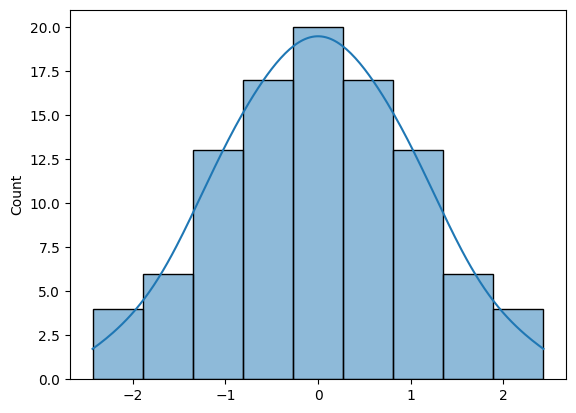

In [65]:
sns.histplot(data_standard_normal_distribution, kde=True)

### Central Limit Theorem

When the sample lenght increases, the sampling distribution of your mean tends to close to the normal distribution

The sampling distribution of the standardized sample mean tends towards the standard normal distribution even if the original variables themselves are not normally distributed.

In [66]:
random_data = np.random.randint(126, 192, 500)
random_data.mean()

159.048

It's not a normal distribution

<AxesSubplot: ylabel='Count'>

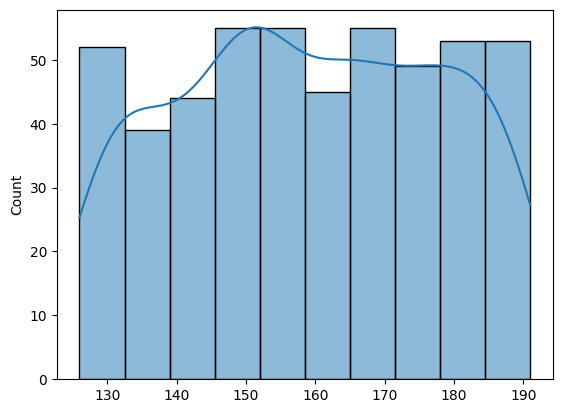

In [67]:
sns.histplot(random_data, kde=True)

Getting the mean from 1000 random list of 500 samples each

In [68]:
means = [np.mean(np.random.randint(126, 192, 500)) for _ in range(1000)]

Plotting the normal distribution, proving the central limit theorem

<AxesSubplot: ylabel='Count'>

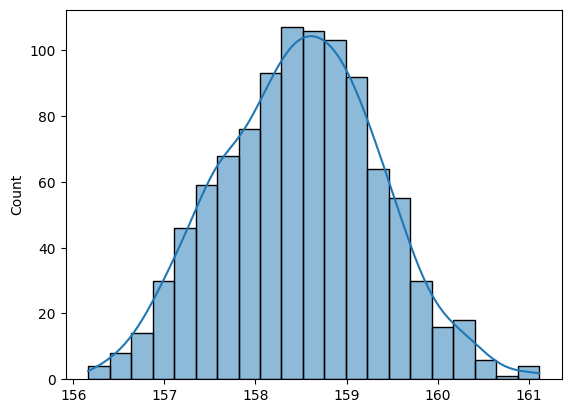

In [69]:
sns.histplot(means, kde=True)

### Gamma distribution

Values asymmetrical to the right

I.e: products lifetime

<AxesSubplot: ylabel='Count'>

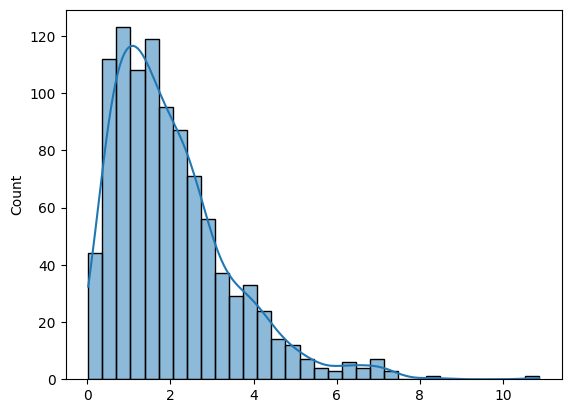

In [70]:
data_gama = stats.gamma.rvs(a=2, size=1000)
sns.histplot(data_gama, kde=True)

### Exponential distribution

It's a type of gamma distribution

<AxesSubplot: ylabel='Count'>

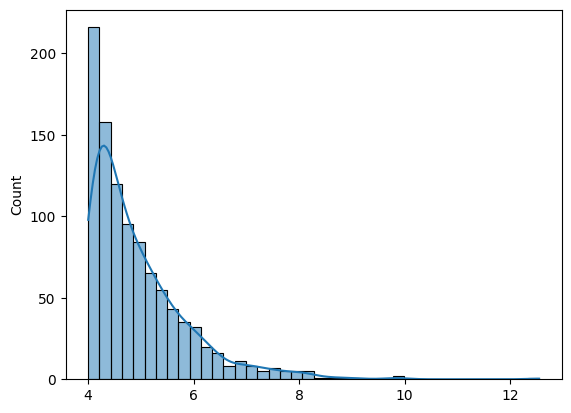

In [71]:
data_exp = stats.expon.rvs(4, size=1000)
sns.histplot(data_exp, kde=True)

### Uniform distribution

The values in the database have the same frequency probabilities

The plot looks like a square

<AxesSubplot: ylabel='Count'>

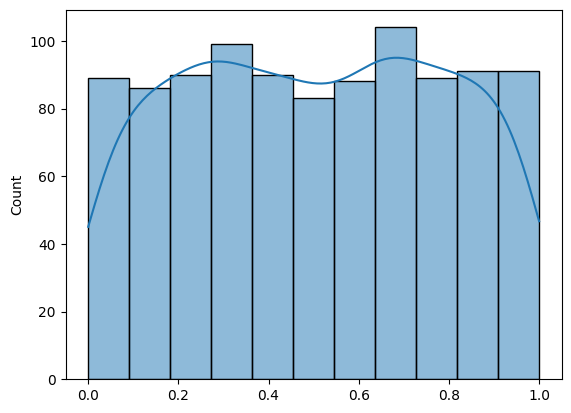

In [72]:
data_uniform = stats.uniform.rvs(size=1000)
sns.histplot(data_uniform, kde=True)

## Discrete variables

### Bernoulli distribution

Specific type of binomial distribution

It has only two outcomes: success or failure

It only has two variables

In [73]:
# p = probability of success
data_bernoulli = stats.bernoulli.rvs(size=1000, p=0.5)
data_bernoulli

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [74]:
np.unique(data_bernoulli, return_counts=True)

(array([0, 1]), array([515, 485]))

<AxesSubplot: ylabel='Count'>

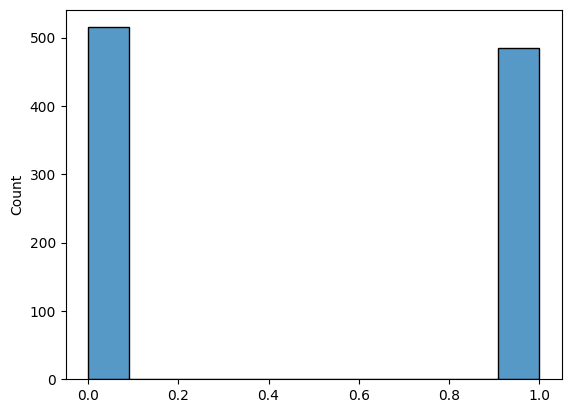

In [75]:
sns.histplot(data_bernoulli, kde=False)

### Binominal distribution

It has success and failure probability of two or more variables

In [76]:
# n = num variables
# p = probabilities of the variables
data_binominal = stats.binom.rvs(size=500, n=3, p=0.5)
data_binominal

array([1, 2, 1, 3, 0, 1, 1, 0, 2, 1, 1, 2, 3, 2, 1, 3, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 3, 2, 2, 2, 0, 1, 0, 2, 2, 0, 3, 1, 1, 2, 0, 0,
       2, 2, 1, 3, 3, 3, 3, 1, 0, 1, 1, 2, 2, 1, 3, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 3, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 0, 3, 2, 0, 1, 2, 0, 2, 1, 1, 1, 3, 0, 0, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 3, 2, 0, 1, 1,
       3, 3, 0, 2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 3,
       2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 3, 2, 2, 0,
       3, 1, 1, 3, 1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 3, 2,
       2, 2, 2, 2, 3, 2, 1, 1, 0, 2, 1, 1, 2, 3, 0, 1, 1, 0, 1, 2, 2, 2,
       2, 1, 0, 2, 1, 2, 2, 0, 1, 3, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 3, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 3,
       2, 3, 1, 1, 1, 3, 2, 2, 2, 1, 1, 2, 2, 1, 3, 1, 2, 0, 0, 3, 3, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1,

<AxesSubplot: ylabel='Count'>

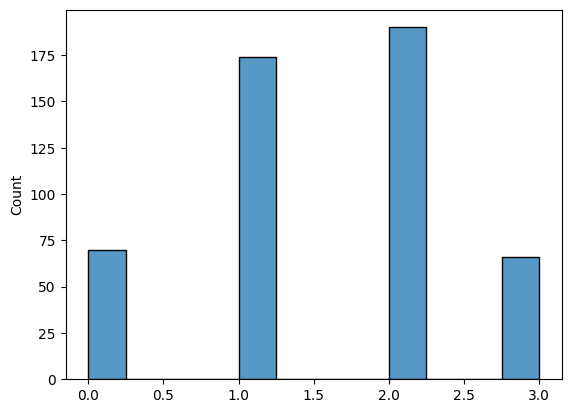

In [77]:
sns.histplot(data_binominal, kde=False)

### Poisson distribution

Number of times that an event occurred

I.e: number of visitors on a web site

In [78]:
data_poisson = stats.poisson.rvs(size=500, mu=5)
data_poisson

array([ 4,  6,  3,  4,  7,  5,  4,  2,  3,  3,  6,  4,  3,  5,  5,  4,  5,
        5,  2,  6,  3,  6,  6,  2,  3,  3,  4,  0,  7,  9,  5,  8,  5,  3,
        6, 10,  5,  2,  2,  7,  4,  8,  1,  6,  6,  3,  6,  6,  4,  3,  3,
        4,  7,  3,  6,  6,  2,  6,  8,  4,  7,  8,  5,  8,  3,  6,  4,  2,
        3,  4,  8,  3,  4,  2,  2,  1,  5,  2,  5,  4,  2,  2,  5,  7,  8,
        7,  5,  4,  3,  5,  5,  4,  4,  8,  5,  5,  8,  2,  8,  3,  5,  2,
        5,  5,  6,  3,  4,  1,  4,  2,  2, 11,  7,  6,  4,  7,  6,  1,  6,
        5,  5,  5,  3,  5,  8,  6,  6,  6,  6,  6,  6,  2,  5,  2,  5,  6,
       10,  3,  8,  7,  6,  9,  2,  0,  5,  7,  9,  4,  1,  0,  4,  9,  3,
        4,  7,  4,  1,  6,  5,  5,  7,  3,  6,  1,  2,  2,  3,  6,  4,  6,
        7,  4,  3,  3,  6,  5,  7,  0,  2,  4,  6,  2,  5,  3,  7, 10,  6,
        3,  4,  6,  3,  3,  6,  7,  7,  8,  9, 10,  4,  5,  4,  3,  5,  5,
        2,  5,  2,  8,  3,  4,  5,  3,  6,  3,  6,  5,  6,  1,  4,  3,  5,
        2,  2,  8,  4,  6

In [79]:
np.unique(data_poisson, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([ 8, 15, 53, 73, 78, 96, 71, 40, 34, 14, 13,  3,  1,  1]))

<AxesSubplot: ylabel='Count'>

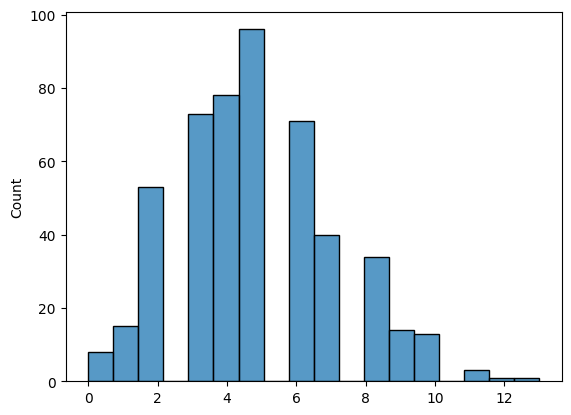

In [80]:
sns.histplot(data_poisson, kde=False)

### Using a csv database to plot histogram for each attribute

In [81]:
import os

In [82]:
os.listdir()

['.git',
 '.gitignore',
 'absolute_relative_data',
 'Bases de dados',
 'frequency_distribution',
 'population_sampling',
 'position_dispersion',
 'position_dispertion',
 'README.md',
 'Slides',
 'statistical_distributions']

In [83]:
census = pd.read_csv('Bases de dados/census.csv')
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [84]:
def plot_hist(data):
    print(np.unique(data, return_counts=True))
    sns.histplot(data, kde=True)

Age

(array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90]), array([395, 550, 712, 753, 720, 765, 877, 798, 841, 785, 835, 867, 813,
       861, 888, 828, 875, 886, 876, 898, 858, 827, 816, 794, 808, 780,
       770, 724, 734, 737, 708, 543, 577, 602, 595, 478, 464, 415, 419,
       366, 358, 366, 355, 312, 300, 258, 230, 208, 178, 150, 151, 120,
       108,  89,  72,  67,  64,  51,  45,  46,  29,  23,  22,  22,  20,
        12,   6,  10,   3,   1,   1,   3,  43]))


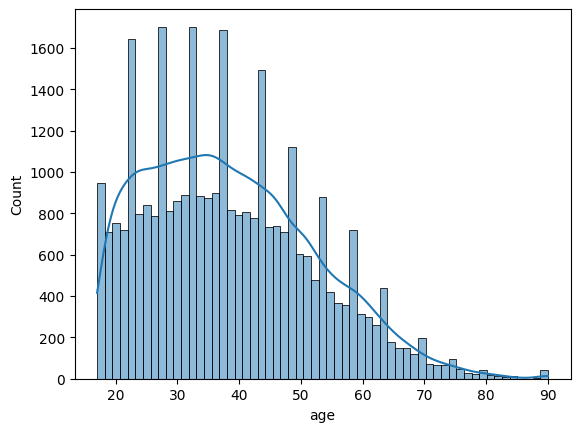

In [85]:
plot_hist(census['age']) #gama

Workclass


(array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object), array([ 1836,   960,  2093,     7, 22696,  1116,  2541,  1298,    14]))


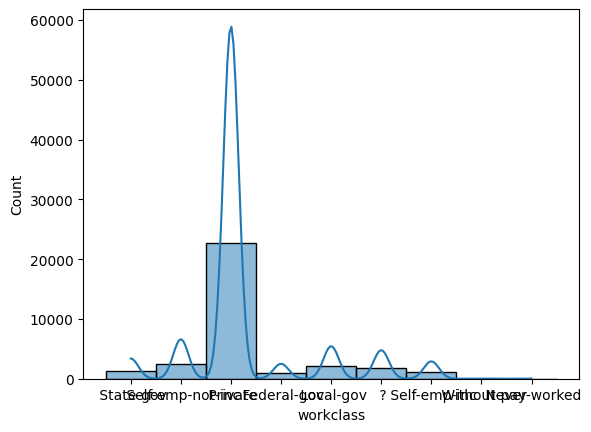

In [86]:
plot_hist(census['workclass']) #poisson

Final weight

(array([  12285,   13769,   14878, ..., 1366120, 1455435, 1484705]), array([1, 1, 1, ..., 1, 1, 1]))


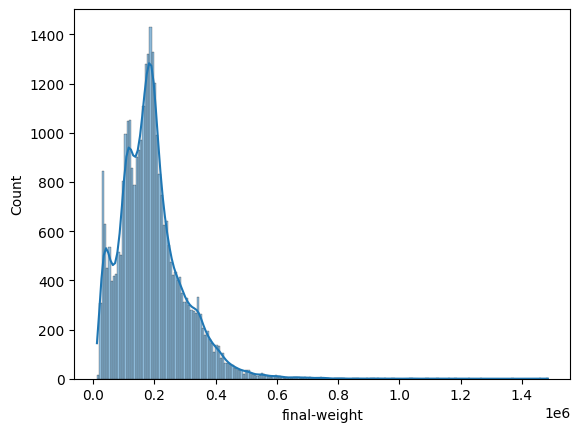

In [87]:
plot_hist(census['final-weight']) #gama

Education

(array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object), array([  933,  1175,   433,   168,   333,   646,   514,  1067,  1382,
        5355,   413, 10501,  1723,    51,   576,  7291]))


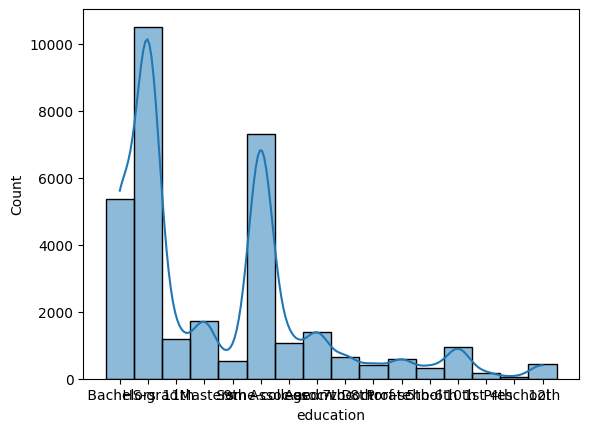

In [88]:
plot_hist(census['education']) #binominal

Education num

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]), array([   51,   168,   333,   646,   514,   933,  1175,   433, 10501,
        7291,  1382,  1067,  5355,  1723,   576,   413]))


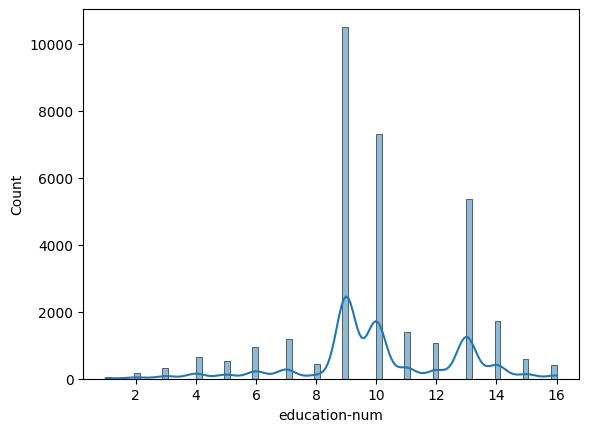

In [89]:
plot_hist(census['education-num']) #binominal

Marital status

(array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object), array([ 4443,    23, 14976,   418, 10683,  1025,   993]))


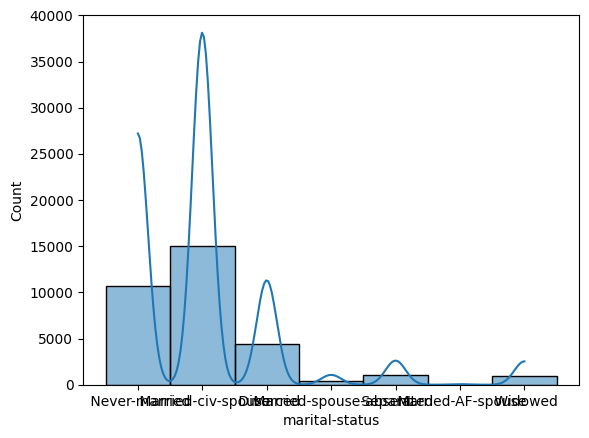

In [90]:
plot_hist(census['marital-status']) #binominal

Occupation

(array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object), array([1843, 3770,    9, 4099, 4066,  994, 1370, 2002, 3295,  149, 4140,
        649, 3650,  928, 1597]))


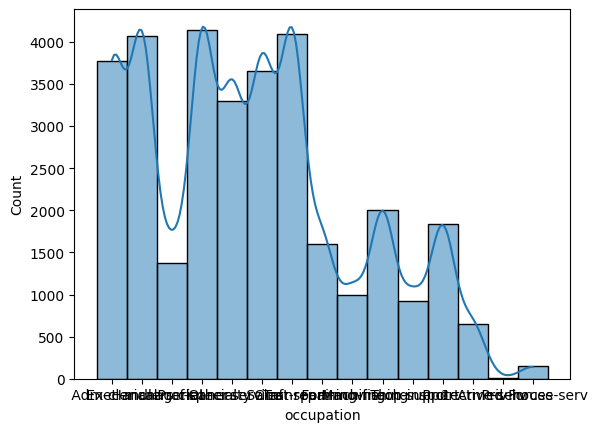

In [91]:
plot_hist(census['occupation']) #uniform

Relationship

(array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife'], dtype=object), array([13193,  8305,   981,  5068,  3446,  1568]))


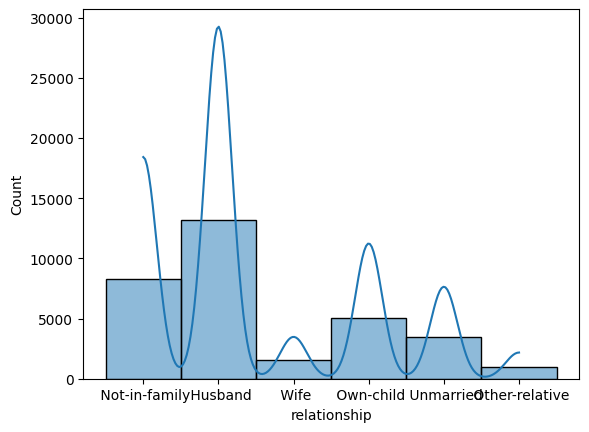

In [92]:
plot_hist(census['relationship']) #binominal

Race

(array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'], dtype=object), array([  311,  1039,  3124,   271, 27816]))


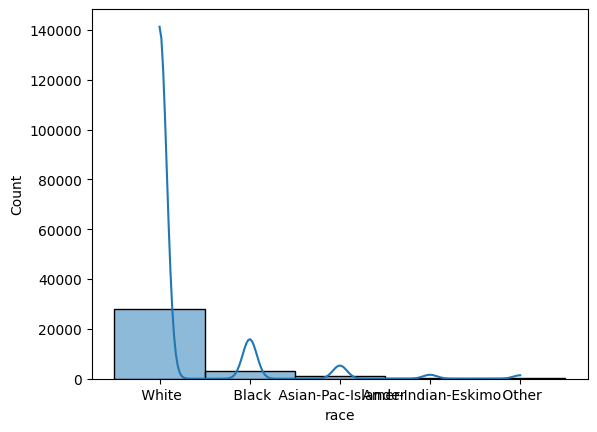

In [93]:
plot_hist(census['race']) #binominal

Sex

(array([' Female', ' Male'], dtype=object), array([10771, 21790]))


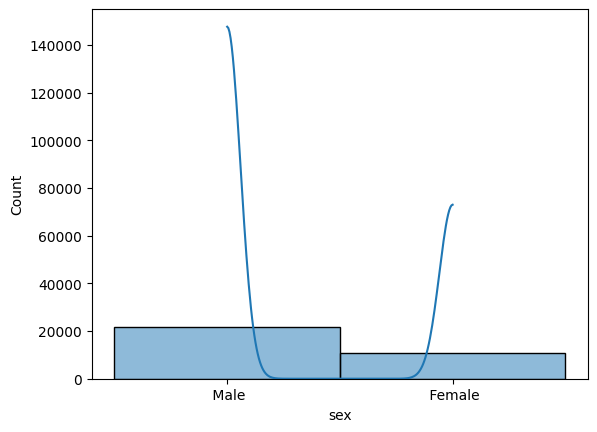

In [94]:
plot_hist(census['sex']) #bernoulli

Capital gain

(array([    0,   114,   401,   594,   914,   991,  1055,  1086,  1111,
        1151,  1173,  1409,  1424,  1455,  1471,  1506,  1639,  1797,
        1831,  1848,  2009,  2036,  2050,  2062,  2105,  2174,  2176,
        2202,  2228,  2290,  2329,  2346,  2354,  2387,  2407,  2414,
        2463,  2538,  2580,  2597,  2635,  2653,  2829,  2885,  2907,
        2936,  2961,  2964,  2977,  2993,  3103,  3137,  3273,  3325,
        3411,  3418,  3432,  3456,  3464,  3471,  3674,  3781,  3818,
        3887,  3908,  3942,  4064,  4101,  4386,  4416,  4508,  4650,
        4687,  4787,  4865,  4931,  4934,  5013,  5060,  5178,  5455,
        5556,  5721,  6097,  6360,  6418,  6497,  6514,  6723,  6767,
        6849,  7298,  7430,  7443,  7688,  7896,  7978,  8614,  9386,
        9562, 10520, 10566, 10605, 11678, 13550, 14084, 14344, 15020,
       15024, 15831, 18481, 20051, 22040, 25124, 25236, 27828, 34095,
       41310, 99999]), array([29849,     6,     2,    34,     8,     5,    25,     4,    

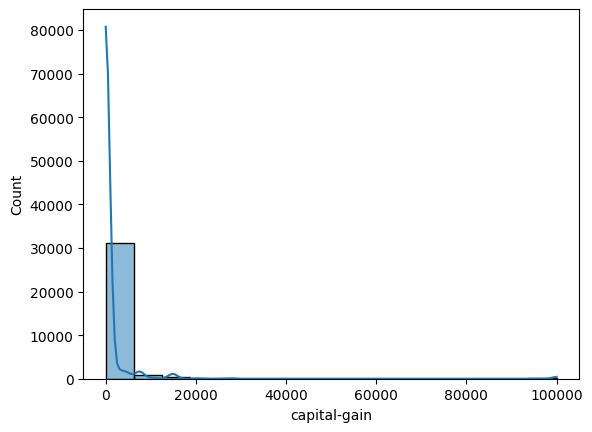

In [95]:
plot_hist(census['capital-gain']) #Exponential

Capital loos

(array([   0,  155,  213,  323,  419,  625,  653,  810,  880,  974, 1092,
       1138, 1258, 1340, 1380, 1408, 1411, 1485, 1504, 1539, 1564, 1573,
       1579, 1590, 1594, 1602, 1617, 1628, 1648, 1651, 1668, 1669, 1672,
       1719, 1721, 1726, 1735, 1740, 1741, 1755, 1762, 1816, 1825, 1844,
       1848, 1876, 1887, 1902, 1944, 1974, 1977, 1980, 2001, 2002, 2042,
       2051, 2057, 2080, 2129, 2149, 2163, 2174, 2179, 2201, 2205, 2206,
       2231, 2238, 2246, 2258, 2267, 2282, 2339, 2352, 2377, 2392, 2415,
       2444, 2457, 2467, 2472, 2489, 2547, 2559, 2603, 2754, 2824, 3004,
       3683, 3770, 3900, 4356]), array([31042,     1,     4,     3,     3,    12,     3,     2,     6,
           2,     7,     2,     4,     7,     7,    21,     1,    51,
          18,     1,    25,     6,    20,    40,     8,    47,     9,
          15,     2,     9,     4,    24,    34,    22,    18,     4,
           2,    42,    24,     2,    14,     2,     4,     1,    51,
          39,   159,   202,     

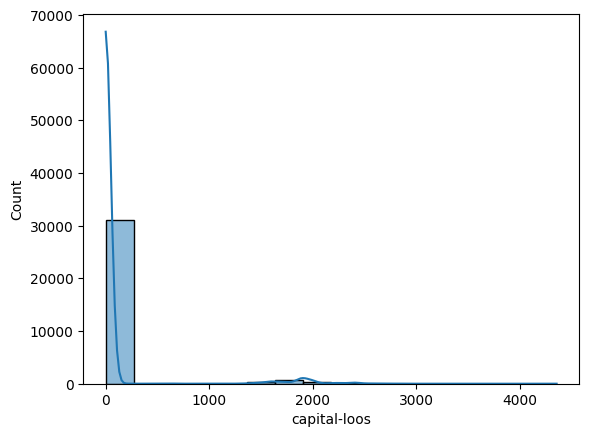

In [96]:
plot_hist(census['capital-loos']) #exponential

Hour per week

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 94, 95, 96, 97, 98, 99]), array([   20,    32,    39,    54,    60,    64,    26,   145,    18,
         278,    11,   173,    23,    34,   404,   205,    29,    75,
          14,  1224,    24,    44,    21,   252,   674,    30,    30,
          86,     7,  1149,     5,   266,    39,    28,  1297,   220,
         149,   476,    38, 15217,    36,   219,   151,   212,  1824,
          82,    49,   517,    29,  2819,    13,   138,    25,    41,
         694,    97,    17,    28,     5,  1475,     2,    18,    10,
          14,   244,    17,     4,    12,   291,    71,     2,     1,
          66,     3

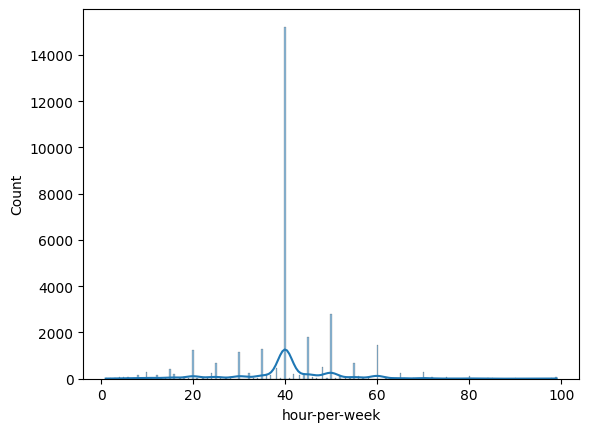

In [97]:
plot_hist(census['hour-per-week']) #binominal or poisson

Native country

(array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object), array([  583,    19,   121,    75,    59,    95,    70,    28,   106,
          90,    29,   137,    29,    64,    44,     1,    13,    20,
          13,   100,    43,    24,    73,    81,    62,    18,   643,
          34,    14,    31,   198,    60,    37,   114,    12,    80,
          51,    18,    19, 29170,    67,    16]))


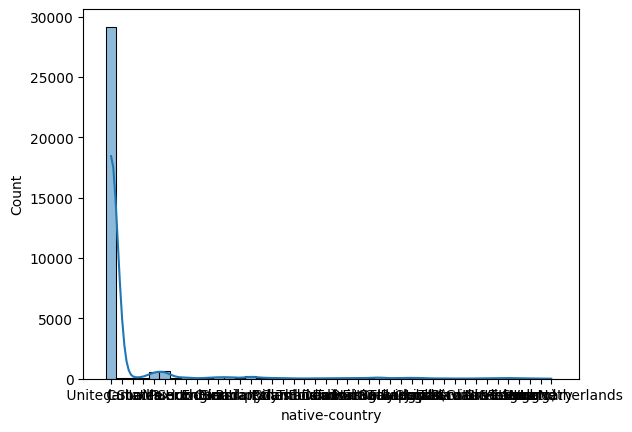

In [98]:
plot_hist(census['native-country']) #binominal

Bernoulli

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))


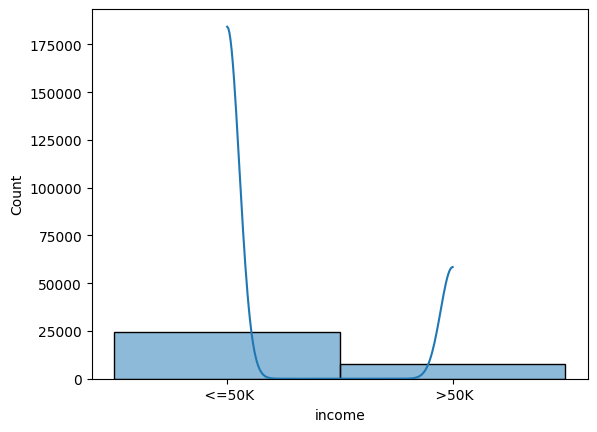

In [99]:
plot_hist(census['income']) #bernoulli

## Naive bayes and distributions

### Bernoulli

In [101]:
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [102]:
census['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [107]:
np.unique(census['sex'], return_counts=True)

(array([' Female', ' Male'], dtype=object), array([10771, 21790]))

<AxesSubplot: xlabel='sex', ylabel='Count'>

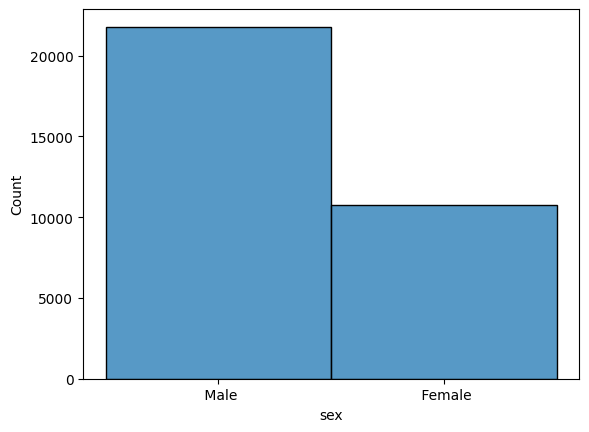

In [109]:
sns.histplot(census['sex'])

In [110]:
X = census['sex'].values
X

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

In [112]:
encoder = LabelEncoder()
X = encoder.fit_transform(X)
X

array([1, 1, 1, ..., 0, 1, 0])

In [113]:
X.shape

(32561,)

In [116]:
X = X.reshape(-1, 1)
X.shape

(32561, 1)

In [117]:
y = census['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [120]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

BernoulliNB()

In [122]:
y_pred = bernoulli_nb.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.7592507293106096

### Multinomial

In [124]:
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [125]:
columns_multinomial = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
census[columns_multinomial].head()

,workclass,education,marital-status,occupation,relationship,race,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba


In [132]:
encoders = [LabelEncoder()] * len(columns_multinomial)
encoders

[LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder()]

In [134]:
for i, col in enumerate(columns_multinomial):
    census[col] = encoders[i].fit_transform(census[col])

census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K


In [135]:
X = census[columns_multinomial].values
X.shape

(32561, 7)

In [136]:
y = census['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape

((26048, 7), (6513, 7))

In [142]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)

MultinomialNB()

In [143]:
y_pred = multinomial_nb.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.7492706893904498

## Z-score and KNN

### Without standarlizer

In [166]:
credit = pd.read_csv('Bases de dados/credit_data.csv')
credit.dropna(inplace=True)
credit.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [152]:
train_columns = ['income', 'age', 'loan']
target_column = ['c#default']

In [153]:
X = credit[train_columns].values
X.shape

(1997, 3)

In [154]:
y = credit[target_column].values
y.shape

(1997, 1)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [157]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

/media/lps/Storage/anaconda3/envs/model/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [158]:
y_pred = knn.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8175

### Using StandardScaler - Z score

In [163]:
credit.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
credit.drop(columns=['i#clientid'], inplace=True)

In [174]:
X = credit[train_columns].copy()
y = credit[target_column].values

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Using pipeline

In [178]:
processor = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), train_columns)
])

pipeline = Pipeline([
    ('processor', processor),
    ('knn', KNeighborsClassifier())
])

pipeline.fit(X_train, y_train)

/media/lps/Storage/anaconda3/envs/model/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['income', 'age', 'loan'])])),
                ('knn', KNeighborsClassifier())])

In [179]:
y_pred = pipeline.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.99

## Avoiding skewed data by using log function

In [180]:
houses = pd.read_csv('Bases de dados/house_prices.csv')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Using only the price and sqft_ling columns

Both are not a normal distribution

<AxesSubplot: xlabel='price', ylabel='Count'>

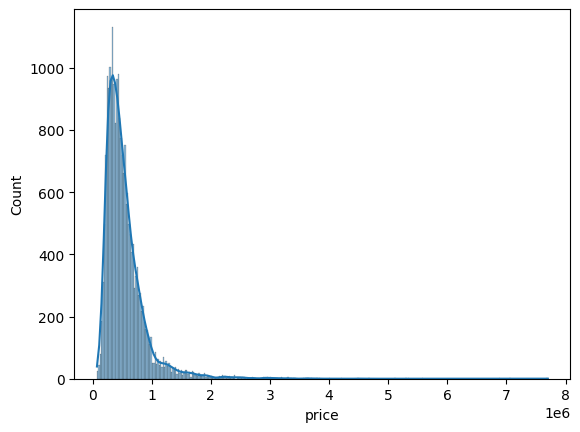

In [182]:
sns.histplot(houses['price'], kde=True)

<AxesSubplot: xlabel='sqft_living', ylabel='Count'>

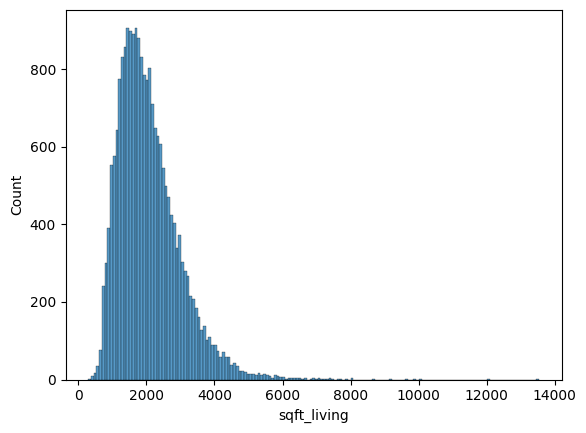

In [183]:
sns.histplot(houses['sqft_living'])

Applying log function to get a normal distribution

In [184]:
price_log = np.log(houses['price'])
sqrt_living_log = np.log(houses['sqft_living'])

Plotting histgram for each variable

<AxesSubplot: xlabel='price', ylabel='Count'>

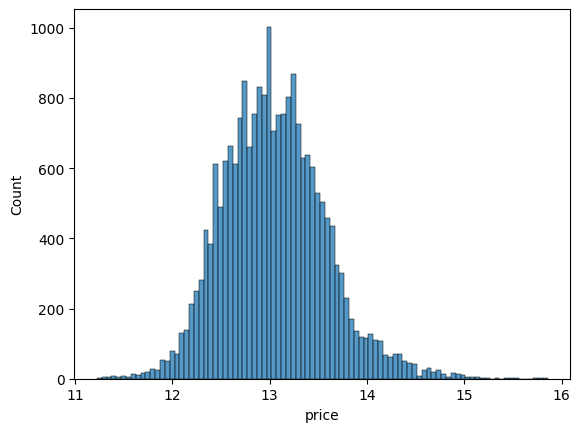

In [185]:
sns.histplot(price_log)

<AxesSubplot: xlabel='sqft_living', ylabel='Count'>

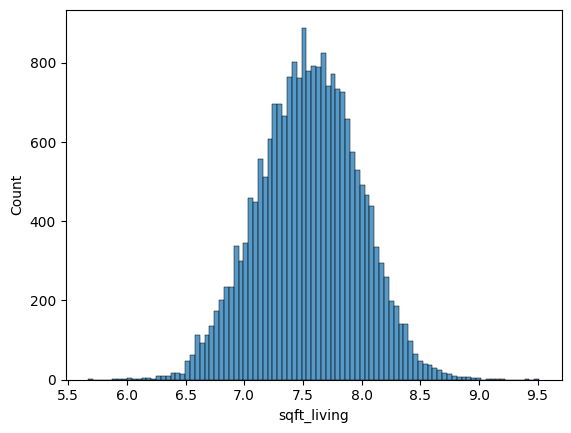

In [186]:
sns.histplot(sqrt_living_log)

Both are now a normal distribution

## Weights initializer in neural networks

In [187]:
tf.__version__

2023-08-11 13:25:00.227109: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-11 13:25:00.227128: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.7.0'

### Random normal

In [191]:
normal = initializers.RandomNormal()
normal_data = normal(shape=[1000])

In [194]:
np.mean(normal_data), np.std(normal_data)

(0.00015969467, 0.049006227)

<AxesSubplot: ylabel='Count'>

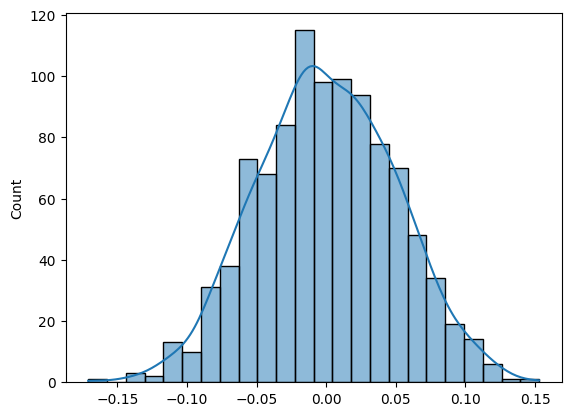

In [193]:
sns.histplot(normal_data, kde=True)

### Random uniform

In [195]:
uniform = initializers.RandomUniform()
uniform_data = uniform(shape=[1000])

In [196]:
np.min(uniform_data), np.max(uniform_data)

(-0.04989896, 0.049800005)

<AxesSubplot: ylabel='Count'>

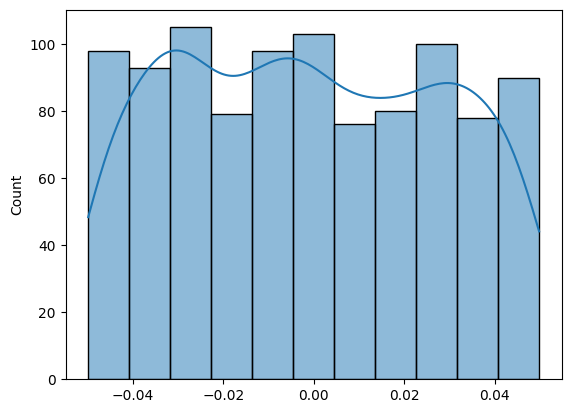

In [197]:
sns.histplot(uniform_data, kde=True)

### Glorot normal

- Centered on 0 with stddev = sqrt(2 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor
- https://keras.io/api/layers/initializers/

In [198]:
import math
# 10 -> 100 -> 100 -> 1 = nn units

# 10 -> 100
print(f'10 -> 100 : {math.sqrt(2/(10 + 100))}')

# -->100 -> 100
print(f'-->100 -> 100 : {math.sqrt(2/(100 + 100))}')

# -->100 -> 1
print(f'-->100 -> 1 : {math.sqrt(2/(100 + 1))}')

10 -> 100 : 0.13483997249264842
-->100 -> 100 : 0.1
-->100 -> 1 : 0.14071950894605836


In [199]:
glorot_normal = initializers.GlorotNormal()
glorot_normal_data = glorot_normal(shape=[1000])

<AxesSubplot: ylabel='Count'>

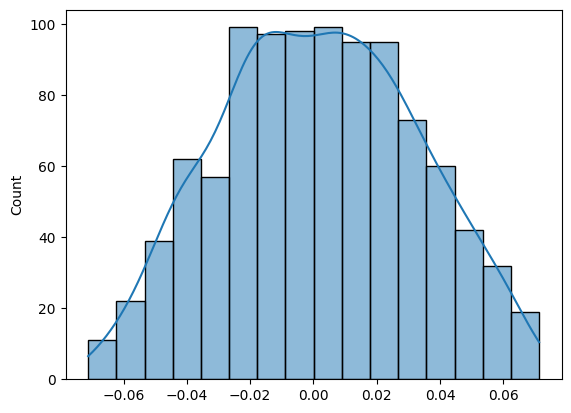

In [200]:
sns.histplot(glorot_normal_data, kde=True)

### Glorot uniform

In [201]:
glorot_uniform = initializers.GlorotUniform()
glorot_uniform_data = glorot_uniform(shape=[1000])

<AxesSubplot: ylabel='Count'>

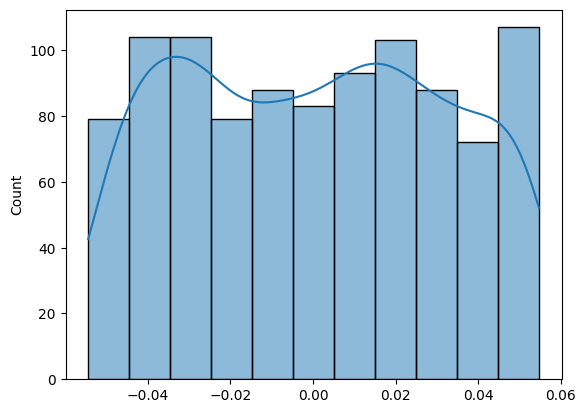

In [203]:
sns.histplot(glorot_uniform_data, kde=True)

## Normality test

In [204]:
normal = stats.norm.rvs(size=1000)
nonnormal = stats.skewnorm.rvs(a=10, size=1000)

### Histogram

<AxesSubplot: ylabel='Count'>

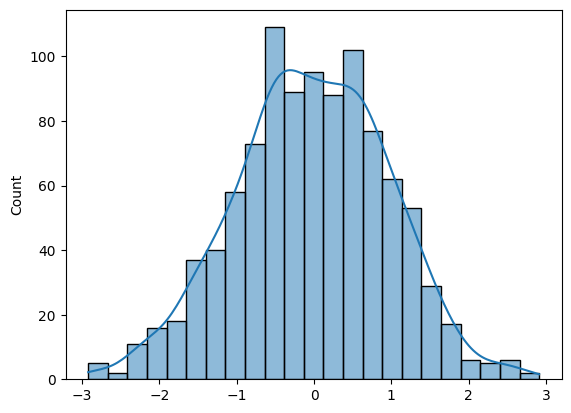

In [205]:
sns.histplot(normal, kde=True)

<AxesSubplot: ylabel='Count'>

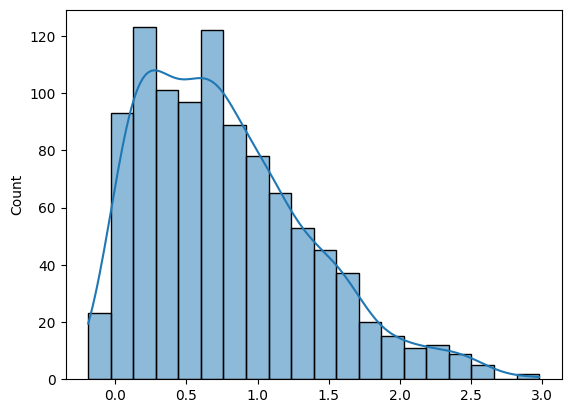

In [206]:
sns.histplot(nonnormal, kde=True)

### Quantile-quantile plot

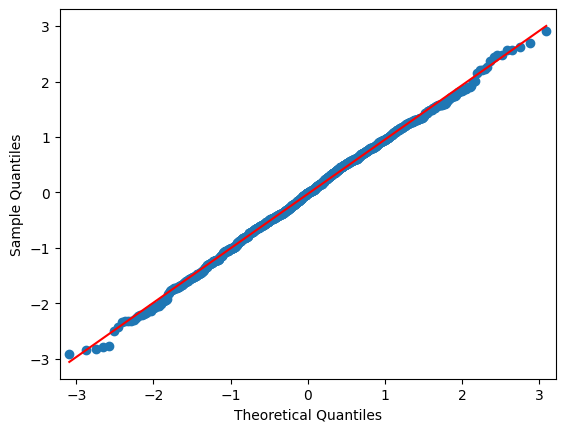

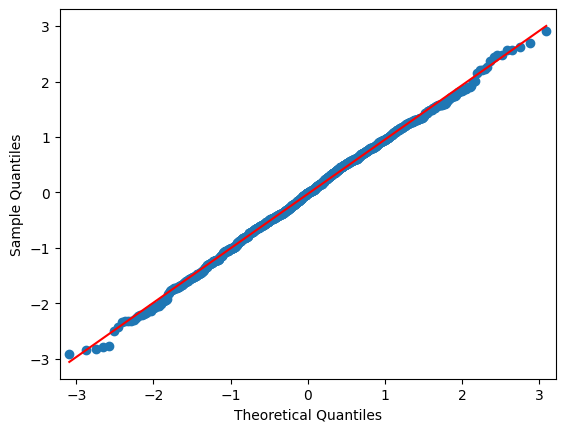

In [210]:
qqplot(normal, line = 's')

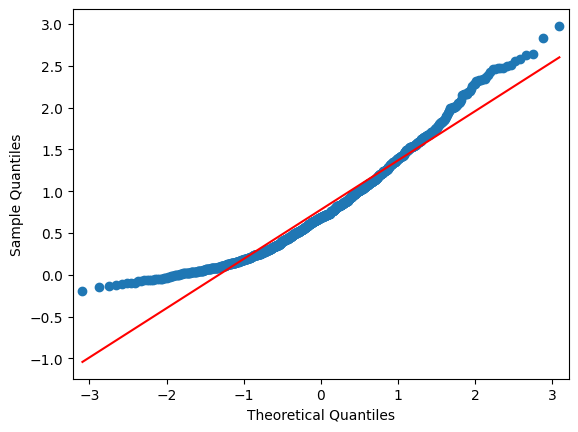

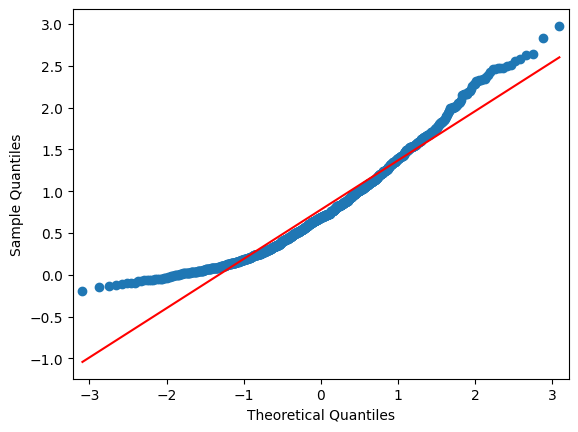

In [211]:
qqplot(nonnormal, line='s')

### Shapiro-Wilk test

- p-value is used to interpret the statistic test
- p-value <= alpha -> reject the hipotesis then not normal
- p-value > alpha -> doesn't reject the hipotesis then it's normal

In [212]:
# Using 95% confidence
def shapiro_test(data, alpha=0.05)->None:
    _, p = stats.shapiro(data)

    if p > alpha:
        print('Its a normal distribution')
    else:
        print('Its not a normal distribution')

In [213]:
shapiro_test(normal)

Its a normal distribution


In [214]:
shapiro_test(nonnormal)

Its not a normal distribution
